<a href="https://colab.research.google.com/github/MP-cod/PyTorch-fundamentals-25-hours-workshop-/blob/main/Pytorch_computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch computer vision

* See reference notebook - Dan's github repo
* Reference online book -[Dan's notebook](https://https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbHlOWS1LLTRZT05kQlpNZ29jNXJvWGxScnlCQXxBQ3Jtc0trWG5NTW9EdDR6bXYxRWVfUUI2QzRqbm5FU1dqb3paNnRWc3hzSV9DaXcyYTdrSlNyYUh1dC13eFZTbkJsWC1YZGF0UXJRRF93Z0otVlA2Nzlla05CNTgxLWxsNEIweXBLMV9Sd1BLbUNUc1Bra2hqTQ&q=https%3A%2F%2Flearnpytorch.io%2F&v=V_xro1bcAuA)

## Computer vision libraries in Pytorch

* [`torchvision`](https://https://www.google.com/url?q=https%3A%2F%2Fhttps%3A%2F%2Fwww.youtube.com%2Fredirect%3Fevent%3Dvideo_description%26redir_token%3DQUFFLUhqbHlOWS1LLTRZT05kQlpNZ29jNXJvWGxScnlCQXxBQ3Jtc0trWG5NTW9EdDR6bXYxRWVfUUI2QzRqbm5FU1dqb3paNnRWc3hzSV9DaXcyYTdrSlNyYUh1dC13eFZTbkJsWC1YZGF0UXJRRF93Z0otVlA2Nzlla05CNTgxLWxsNEIweXBLMV9Sd1BLbUNUc1Bra2hqTQ%26q%3Dhttps%253A%252F%252Flearnpytorch.io%252F%26v%3DV_xro1bcAuA) -base domain library for Pytorch computer vision
* `torchvision.datasets` - get datasets and data loading function for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own models
* `torchvison.transforms` - functions for maintaining your vision data(images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a python iterbale over a dataset

In [ ]:
#import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib for visualisation
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)


2.3.0+cu121
0.18.0+cu121


## 1. Getting a dataset

the datset we'll be using is FashionMNIST from torchvision datasets:
[PyTorch link](https://https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html)

In [ ]:
# setup training data
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data", #where to download data from
    train=True, #do we want the training datset?
    download=True, #do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/targets?
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14060039.11it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 276031.50it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4986454.24it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19278818.74it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
#see the first training example
image, label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#check the shape or our image
print(f"Image shape:{image.shape} ->[color_channels, height, wdith]")
print(f"Image label: {class_names[label]}")

Image shape:torch.Size([1, 28, 28]) ->[color_channels, height, wdith]
Image label: Ankle boot


### 1.2 Visualising our data

Image shape: torch.Size([1, 28, 28])


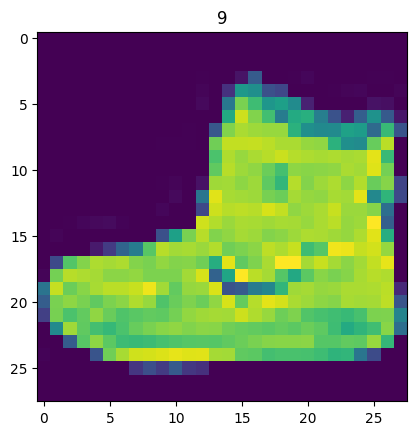

In [ ]:
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);
# image

(-0.5, 27.5, 27.5, -0.5)

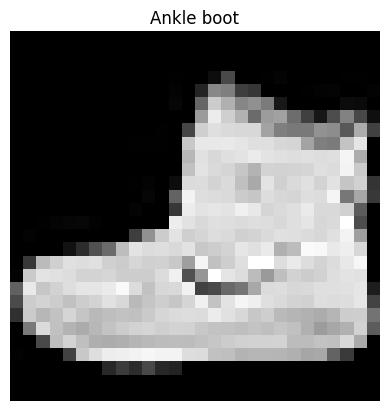

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

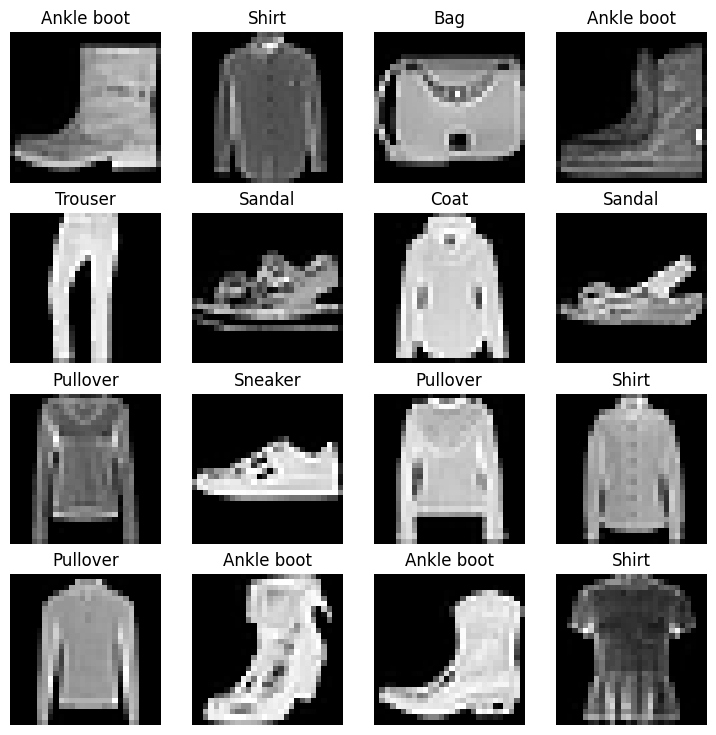

In [ ]:
#plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows, cols =4,4
for i in range(1, rows*cols+1):
  random_idx=torch.randint(0,len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


Do you think these items of clothing (images) could be modelled with pure linear lines? or do you think we'll need non-linear?

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

right now, our data is in the form of Pytorch datasets.

DataLoader turns our dataset into a python iterable.

More specifically, we want our data to turn into batches(or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look(store in memory) at 60000 images in one hit. So we break it down to 32(intuitively) images at a time(batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [ ]:
from torch.utils.data import DataLoader

#setup the batch sizw hyperparameter
BATCH_SIZE=32

#Turn datasets into iterables (batches)
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7cfa0379feb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7cfa0377d450>)

In [ ]:
#Let's check out what we've created
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7cfa0379feb0>, <torch.utils.data.dataloader.DataLoader object at 0x7cfa0377d450>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
#check out what's inside the training dataloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


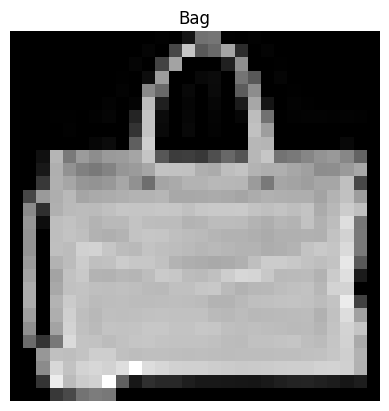

In [ ]:
# show a sample
# torch.manual_seed(42)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item()
img, label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model:0 Build a baseline model

when starting to build a series of ML modelling experiments, its best to practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary

In [ ]:
#create a flatten layer
flatten_model=nn.Flatten()

#get a single sample
x=train_features_batch[0]

#flatten the sample
output=flatten_model(x) #perform forward pass

#print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} ->[color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) ->[color_channels, height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

#setup model with input parameters
model_0=FashionMNISTModelV0(
    input_shape=784, #this is 28*28
    hidden_units=10, #how many units in the hidden layer
    output_shape=len(class_names) #one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup Loss, Optimizer & evaluation metrics

* Loss function-> since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`

* Optimizer-> our optimizer `torch.optim.SGD()` (stochastic gradient descent)

* Evaluation metric-> since we're working on a classification problem, let's use *accuracy* as our evaluation metric.

In [ ]:
# #calculate accuracy (a classification metric)
# def accuracy_fn(y_true, y_pred):
#   correct=torch.eq(y_true, y_pred).sum().item() #torch.eq() calculates where two tensors are equal
#   acc=(correct/len(y_pred))*100
#   return acc

In [ ]:
!pip install requests

In [ ]:
from ast import With
import pathlib
from pathlib import Path
import requests

#download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# import accuracy metric
from helper_functions import accuracy_fn

#setup loss_fn and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

### 3.2 Creating a function to time our experiments

ML is very experimental.

2 main things you'll often track are:
1. Model's performance(loss and accuracy values etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device= None):
  """Prints difference between start and end time."""
  total_time=end-start
  print(f"Train time on {device}: {total_time: 3f} seconds")
  return total_time

In [ ]:
start_time=timer()
#some code...
end_time=timer()
print_train_time(start=start_time, end=end_time, device="cuda")

Train time on cuda:  0.000822 seconds


0.0008215569999947547

In [ ]:
# UPTOHERE: 3.3 Creating a training loop and training a model on batches of data...
#Highlight that the optimizer will update a model's parameters once per batch rather than once per epoch...

### 3.3 Creating a training loop and training a model as batches of data

1. Loop through epochs.
2. Loop through training epochs, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print out what's happening.
5. Time it all (for fun)

In [ ]:
import torch
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Assuming the necessary imports and definitions for model, optimizer, loss function, accuracy function, dataloaders, etc. are already done

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Accumulate train loss & .item() extracts **scalar value** from tensor

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening
        if batch % 100 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test).item() # accumulates the scalar value

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 3200/60000 samples.
Looked at 6400/60000 samples.
Looked at 9600/60000 samples.
Looked at 12800/60000 samples.
Looked at 16000/60000 samples.
Looked at 19200/60000 samples.
Looked at 22400/60000 samples.
Looked at 25600/60000 samples.
Looked at 28800/60000 samples.
Looked at 32000/60000 samples.
Looked at 35200/60000 samples.
Looked at 38400/60000 samples.
Looked at 41600/60000 samples.
Looked at 44800/60000 samples.
Looked at 48000/60000 samples.
Looked at 51200/60000 samples.
Looked at 54400/60000 samples.
Looked at 57600/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 3200/60000 samples.
Looked at 6400/60000 samples.
Looked at 9600/60000 samples.
Looked at 12800/60000 samples.
Looked at 16000/60000 samples.
Looked at 19200/60000 samples.
Looked at 22400/60000 samples.
Looked at 25600/60000 samples.
Looked at 28800/60000 samples.
Looked at 32000/60000 

## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  """Returns a dictionary containing the results of model prediting on data_loader."""
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make predicitons
      y_pred=model(X)

      #Accumulate the loss and acc values per batch
      loss+= loss_fn(y_pred, y)
      acc+= accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find the average loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created iwth a class
          "model_loss": loss.item(),
          "model_acc": acc}

#calculate model 0 results on test dataset
model_0_results=eval_model(model=model_0,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code(for using a GPU if there is one)


In [ ]:
#setup device-agnostic code
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02: Dan's notebook

In [ ]:
#create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),  #flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
#create an instance of model
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784, #this is the output of the flatten after our 28*28 image goes
                            hidden_units=10,
                            output_shape=len(class_names)).to(device) #send to the GPU if it's available
next(model_1.parameters()).device


device(type='cpu')

###6.1 setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss() #tells how wrong our model is
optimizer=torch.optim.SGD(params=model_1.parameters(), #tries to update our model parameters to reduce the loss
                          lr=0.1)


### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
1. training loop-> `train_step()`
2. testing loop-> `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    """Performs a training step with model trying to learn on data_loader."""
    train_loss, train_acc = 0.0, 0.0

    # Put model into training mode
    model.train()

    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (outputs the raw logits from the model)
        y_pred = model(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Accumulate train loss & .item() extracts **scalar value** from tensor
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss & acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Training loss: {train_loss:0.5f} | Train acc: {train_acc:0.2f}%")


In [ ]:
##testing loop
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc=0,0

  #put the model in eval mode
  model.eval()

  #turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      #put data on target device
      X,y=X.to(device), y.to(device)

      #1. Forward pass
      test_pred=model(X)

      #2. Calculate the loss/acc
      test_loss+= loss_fn(test_pred, y)
      test_acc+=accuracy_fn(y_true=y,
                                y_pred=test_pred.argmax(dim=1)) #go from logits -> pred labels

    #adjust metrics and print out
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test loss:{test_loss:0.5f} | Test acc: {test_acc:0.2f}%")


In [ ]:
torch.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_on_gpu=timer()

#set epochs
epochs=3

#create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-----------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-----------
Training loss: 1.09199 | Train acc: 61.34%
Test loss:0.95636 | Test acc: 65.00%
Epoch:1
-----------
Training loss: 0.78101 | Train acc: 71.93%
Test loss:0.72227 | Test acc: 73.91%
Epoch:2
-----------
Training loss: 0.67027 | Train acc: 75.94%
Test loss:0.68500 | Test acc: 75.02%
Train time on cpu:  57.818994 seconds


> **Note:** Sometimes, depending on your data/hardware you might find that your model train faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from GPU outweighs compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms of compute capability than the GPU.
>
>For more, see [ML go brrr](https://horace.io/brrr_intro.html)

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device=device):
  """Returns a dictionary containing the results of model prediting on data_loader."""
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #make our data device agnostic
      X, y=X.to(device), y.to(device)
      # make predicitons
      y_pred=model(X)

      #Accumulate the loss and acc values per batch
      loss+= loss_fn(y_pred, y)
      acc+= accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find the average loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created iwth a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
#get model_1 results dictionary
model_1_results=eval_model(model=model_1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                          device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

## 7. Model 2: Building a Convolutional Neural Network(CNN)

CNN's also known as ConvNets
CNN's are known for their capabilities to find patterns in visual data.
To find out more, see this website [CNN Explainer](https://https://poloclub.github.io/cnn-explainer/)

In [ ]:
#create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN Explainer
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        #create a conv layer -> Pytorch docs
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, #there's a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x=self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x=self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x=self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x


In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

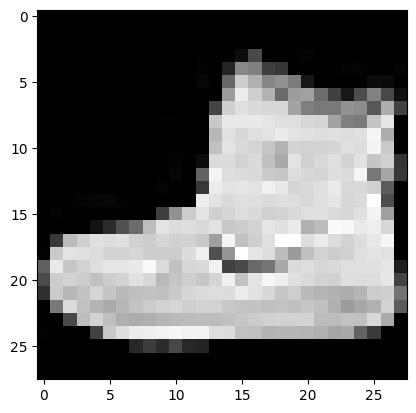

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
rand_image_tensor=torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
#pass image through model
model_2(rand_image_tensor.unsqueeze(0)).to(device)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

see through PyTorch docs for more info

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
torch.manual_seed(42)

#create a batch of images
images=torch.randn(size=(32, 3, 64, 64))
test_image=images[0]

print(f"Image batch shapes: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")

Image batch shapes: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)
#create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=1)

#pass the data through convolutional layer
conv_output=conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2()`

In [ ]:
#print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

#create a sample nn.MaxPool2 layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass data through just the conv layer
test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv layer:\n{test_image_through_conv.shape}")

#pass data through the max pool layer
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer(): and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv layer:
torch.Size([1, 10, 64, 64])
Shape after going through conv_layer(): and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
#create a ranom tensor with a similar number of dimensions to our images
random_tensor=torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor: \n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

#create a max pool layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass the random tensor through the max pool layer
max_pool_tensor=max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

random_tensor


Random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

### 7.3 Setup a loss funtion & Optimizer for `model_2`

In [ ]:
#setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#measure time
from timeit import default_timer as timer
total_train_time_model_2=timer()

#train and test model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

  train_time_end_model_2=timer()
  total_train_time_model_2 =print_train_time(start=total_train_time_model_2,
                                              end=train_time_end_model_2,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Training loss: 0.59518 | Train acc: 78.38%
Test loss:0.39500 | Test acc: 85.99%
Train time on cpu:  70.571888 seconds
Epoch: 1
---------
Training loss: 0.36536 | Train acc: 86.90%
Test loss:0.35244 | Test acc: 86.91%
Train time on cpu:  386.001077 seconds
Epoch: 2
---------
Training loss: 0.32588 | Train acc: 88.13%
Test loss:0.32719 | Test acc: 88.07%
Train time on cpu:  128.570299 seconds


In [ ]:
#get model_2 results
model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
#add trainig time to results comparison
compare_results["training time"]= [total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training time
0,FashionMNISTModelV0,0.476639,83.426518,70.820216
1,FashionMNISTModelV1,0.685001,75.019968,57.818994
2,FashionMNISTModelV2,0.327190,88.069089,128.570299


Text(0, 0.5, 'model')

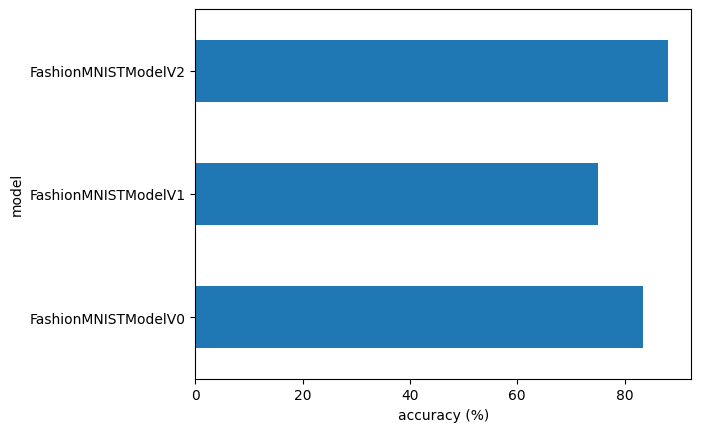

In [ ]:
#visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):

  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample (add a batch dim and pass to target device)
      sample=torch.unsqueeze(sample, dim=0).to(device)

      #forward pass
      pred_logit=model(sample)

      #get prediction probability(logit-> prediction probability)
      pred_prob=torch.softmax(pred_logit.squeeze(), dim=0)

      #get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  #stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [ ]:
import random
# random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

#view the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

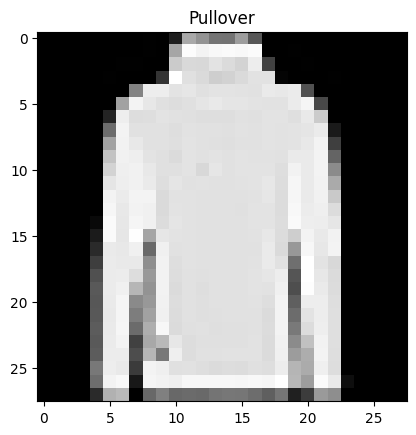

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#make predictions
pred_probs=make_predictions(model=model_2,
                            data=test_samples)

#view first two prediction probabilities
pred_probs[:2]

tensor([[4.4183e-03, 7.3322e-05, 6.0073e-01, 3.7700e-03, 3.6184e-01, 3.6445e-07,
         2.8199e-02, 1.1682e-05, 9.4384e-04, 1.1879e-05],
        [2.4719e-07, 1.8406e-07, 1.3379e-07, 9.6283e-07, 7.2947e-08, 1.3000e-04,
         1.3970e-07, 5.7506e-04, 2.1621e-05, 9.9927e-01]])

In [ ]:
test_labels

[2, 9, 5, 2, 1, 4, 1, 4, 9]

In [ ]:
#convert prediction probabilities to labels
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([2, 9, 5, 2, 1, 4, 3, 6, 9])

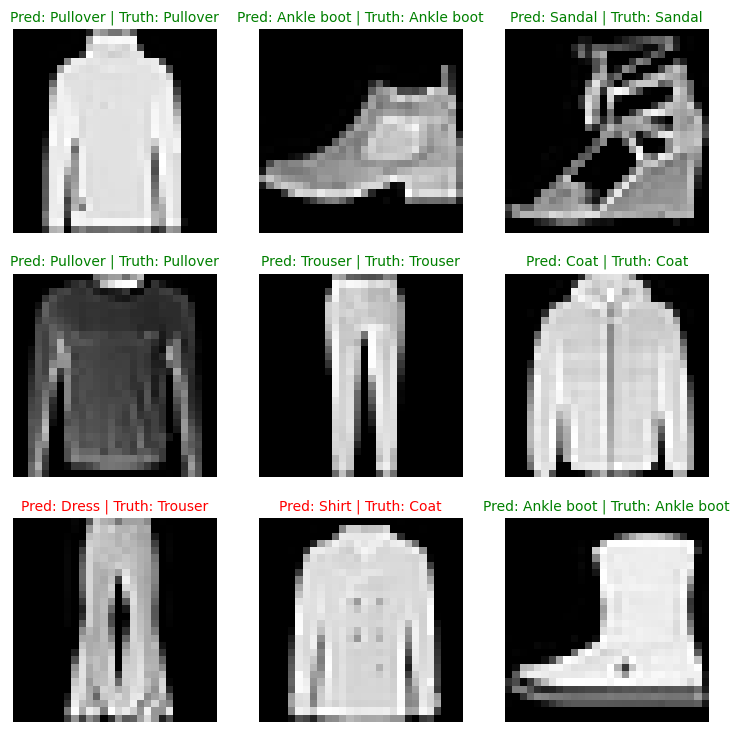

In [ ]:
#plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  #create a subplot
  plt.subplot(nrows, ncols, i+1)

  #plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  #find the prediction(in text form, eg "sandal")
  pred_label=class_names[pred_classes[i]]

  #get the truth label(in text form)
  truth_label=class_names[test_labels[i]]

  #create a title for the plot
  title_text=f"Pred: {pred_label} | Truth: {truth_label}"

  #check for equality b/w pred and truth and change color of title text
  if pred_label==truth_label:
    plt.title(title_text, fontsize=10, c="g") #green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)


## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classfication models visually: Dan's notebook

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
[Torchmetrics docs](https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html#id3)
3. Plot the confusion matrix using `mixtend.plotting.plot_confusion_matrix()`
[mixtend github](https://rasbt.github.io/mlxtend/api_modules/mlxtend.plotting/plot_confusion_matrix/)

In [ ]:
#import tqdm.auto
from tqdm.auto import tqdm

# 1. Make preidctions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    #send the data and targtes to target device
    X,y=X.to(device) , y.to(device)
    #do the forward pass
    y_logit=model_2(X)
    #turn predictions from logits-> prediction probabilities
    y_pred=torch.softmax(y_logit, dim=1).argmax(dim=1)
    #put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 2, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 2, 1, 4, 6, 4, 6, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 4, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
        1, 3, 5, 0, 4, 7, 9, 3]), tensor([7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 4, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 6, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 4, 8, 6, 4,
        6, 4, 9, 7, 6, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
#see if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 50.4 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.1


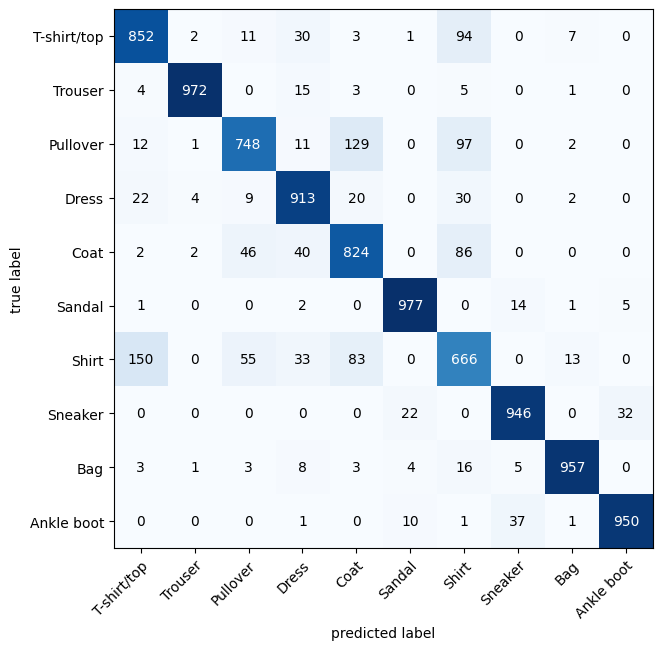

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. steup confusion instance and compare predictions to target
confmat=ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)

#3. plot the confusion matrix
fig, ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

In [ ]:
confmat_tensor

tensor([[852,   2,  11,  30,   3,   1,  94,   0,   7,   0],
        [  4, 972,   0,  15,   3,   0,   5,   0,   1,   0],
        [ 12,   1, 748,  11, 129,   0,  97,   0,   2,   0],
        [ 22,   4,   9, 913,  20,   0,  30,   0,   2,   0],
        [  2,   2,  46,  40, 824,   0,  86,   0,   0,   0],
        [  1,   0,   0,   2,   0, 977,   0,  14,   1,   5],
        [150,   0,  55,  33,  83,   0, 666,   0,  13,   0],
        [  0,   0,   0,   0,   0,  22,   0, 946,   0,  32],
        [  3,   1,   3,   8,   3,   4,  16,   5, 957,   0],
        [  0,   0,   0,   1,   0,  10,   1,  37,   1, 950]])

## 11. Save & load best performing model

In [ ]:
from pathlib import Path
#create a model dictory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#create model save
MODEL_NAME="Pytorch_computer_Vision.ipynb"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/Pytorch_computer_Vision.ipynb


In [ ]:
image_shape=[1,28,28]

In [ ]:
#create a new instance
torch.manual_seed(42)

loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                  hidden_units=10,
                                  output_shape=len(class_names))

#load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
#evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results=eval_model(model=loaded_model_2,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
#check if model reuslts are close to each other
torch.isclose(torch.tensor(model_2_results["model_acc"]),
              torch.tensor(loaded_model_2_results["model_acc"]),
              atol=1e-02)

tensor(True)